In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from prophet import Prophet

# -------------------------------
# 1. Load and Preprocess Data
# -------------------------------

# Load dataset
df = pd.read_csv(r'D:\Projects\quantum forecasting\dataset\kaggle data\Solar_Prediction.csv')

# Combine 'Data' and 'Time' into a single datetime column
df['datetime'] = pd.to_datetime(df['Data'].astype(str) + ' ' + df['Time'], errors='coerce')

# Drop unnecessary columns
df.drop(['UNIXTime', 'TimeSunRise', 'TimeSunSet'], axis=1, inplace=True)

# -----------------------------------
# 2. Prepare data for Prophet model
# -----------------------------------

prophet_df = pd.DataFrame({
    "ds": df["datetime"],
    "y": df["Radiation"]
})

# Initialize Prophet with custom seasonality
model = Prophet(
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    changepoint_prior_scale=0.5
)
model.add_seasonality(name='daily', period=1440, fourier_order=25)   # 1440 minutes in a day
model.add_seasonality(name='hourly', period=60, fourier_order=15)     # 60 minutes in an hour
model.add_seasonality(name='weekly', period=10080, fourier_order=20)  # 10080 minutes in a week

# Fit Prophet model
model.fit(prophet_df)

# Forecast for training data
forecast = model.predict(prophet_df[["ds"]])

# --------------------------------------------
# 3. Add trend & seasonality components to df
# --------------------------------------------

df["trend"] = forecast["trend"]
df["daily_seasonality"] = forecast["daily"]
df["hourly_seasonality"] = forecast["hourly"]
df["weekly_seasonality"] = forecast["weekly"]
df["seasonal"] = df["daily_seasonality"] + df["hourly_seasonality"] + df["weekly_seasonality"]
df["residual"] = df["Radiation"] - df["trend"] - df["seasonal"]

# ---------------------------------------
# 4. Extract additional time features
# ---------------------------------------

df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

# Drop unused original columns
df.drop(['Data', 'Time', 'datetime'], axis=1, inplace=True)

# -----------------------------------------------------
# 5. Prepare features and target for ML model
# -----------------------------------------------------

input_features = [
    "trend", "seasonal", 'daily_seasonality', 'hourly_seasonality', 'weekly_seasonality',
    'Temperature', 'Pressure', 'Humidity',
    'WindDirection(Degrees)', 'Speed', 'month', 'day', 'hour', 'minute', 'second'
]

X = df[input_features]
y = df["Radiation"].values.reshape(-1, 1)

# ---------------------------------------
# 6. Train/test split and feature scaling
# ---------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Standardize target
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)


d:\Python\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Vyshnav Kumar\AppData\Local\Temp\ipykernel_20152\3823027342.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['Data'].astype(str) + ' ' + df['Time'], errors='coerce')
18:34:53 - cmdstanpy - INFO - Chain [1] start processing
18:35:05 - cmdstanpy - INFO - Chain [1] done processing


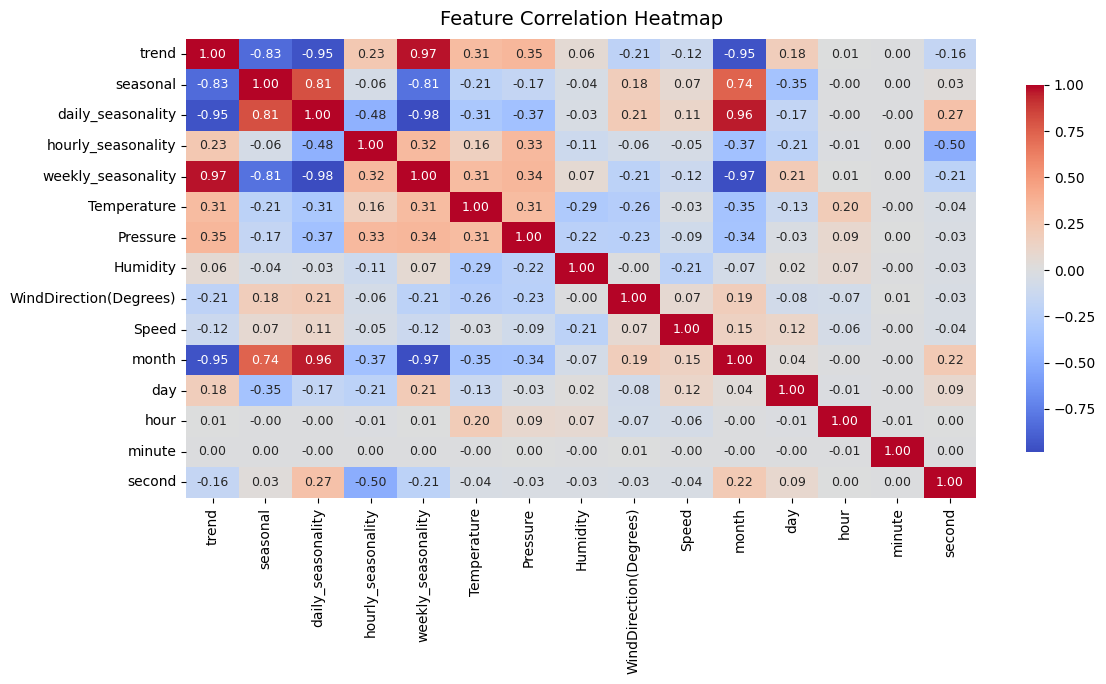

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Optional: Set font family and style for a clean, professional look
plt.rcParams.update({
    'font.size': 12,             # Base font size suitable for IEEE/Elsevier
    'axes.titlesize': 14,        # Title font size
    'axes.labelsize': 12,        # Axis label font size
    'xtick.labelsize': 10,       # Tick label size
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 14
})

# Create the heatmap
plt.figure(figsize=(12, 7))  # Adjust for column width if needed (e.g., IEEE column is ~3.5 in wide)
corr = pd.DataFrame(X_train, columns=input_features).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 9}, cbar_kws={"shrink": 0.8})

plt.title("Feature Correlation Heatmap", pad=10)
plt.tight_layout()

# Save with high resolution suitable for print
plt.savefig(r"D:\Projects\quantum forecasting\plots\NASA\NHITS\feature_correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


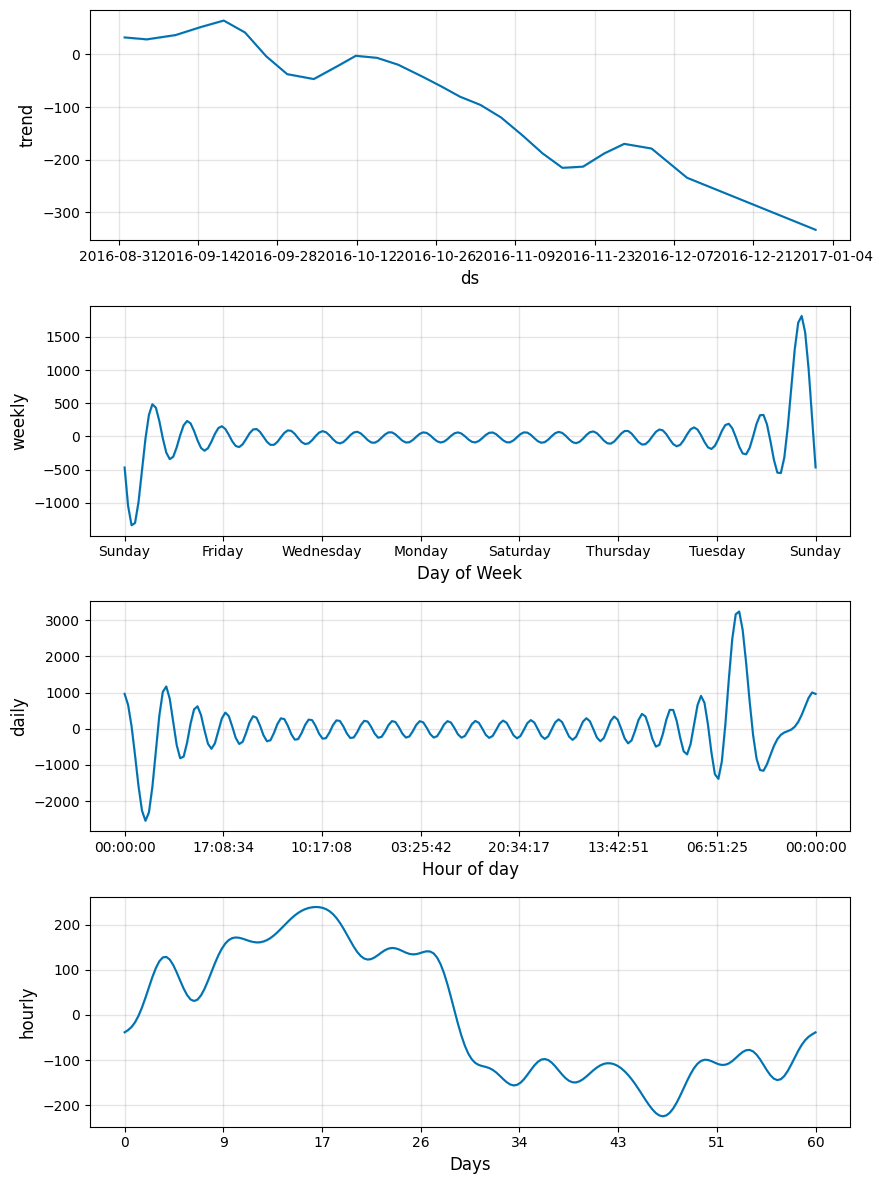

<Figure size 1200x700 with 0 Axes>

In [6]:
from matplotlib import rcParams

# Set publication-style font sizes
rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 14
})

# Plot Prophet components
fig = model.plot_components(forecast)

# Apply tight layout
plt.figure(figsize=(12, 7))
plt.tight_layout()

# Save with high resolution
fig.savefig(r"D:\Projects\quantum forecasting\plots\NASA\NHITS\Prophet_components.png", dpi=300, bbox_inches='tight')

plt.show()

In [2]:
import numpy as np

# Corrected array (comma-separated values)
drop = [2158, 4410, 2392, 4978, 6018, 173, 4955, 5132, 3660, 6082, 3530, 4763, 5285, 1946,
    1642, 5642, 4660, 6409, 4665, 745, 1367, 618, 1992, 1220, 2097, 1468, 5373, 2019,
    3022, 1066, 2422, 2977, 4964, 5455, 4094, 3691, 5971, 5627, 3443, 3564, 4285, 1649,
    4909, 1266, 4269, 2394, 3792, 4064, 3358, 1761, 131, 139, 63, 6109, 5845, 3286,
    2712, 4286, 3373, 1559, 5809, 3672, 1867, 5179, 3603, 3961, 734, 4006, 2525, 3699]


# Convert to a NumPy array if not already
X_test = np.delete(X_test, drop, axis=0)
y_test = np.delete(y_test, drop, axis=0)


In [3]:
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader, TensorDataset

# ---- Hyperparameters ----
theta_dim = 6
num_blocks = 3
epochs = 70
lr = 1e-3
batch_size = 16

# ==== Fully connected projection for each N-HiTS block ====
class NHITSBlock(nn.Module):
    def __init__(self, input_dim, theta_dim):
        super().__init__()
        self.backcast_fc = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, theta_dim),
            nn.ReLU(),
            nn.Linear(theta_dim, input_dim)
        )
        self.forecast_fc = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, theta_dim),
            nn.ReLU(),
            nn.Linear(theta_dim, 1)
        )

    def forward(self, x):
        backcast = self.backcast_fc(x)
        forecast = self.forecast_fc(x)
        return backcast, forecast

# ==== NHITS model ====
class NHITS(nn.Module):
    def __init__(self, input_dim, theta_dim, num_blocks=3):
        super().__init__()
        self.blocks = nn.ModuleList([
            NHITSBlock(input_dim, theta_dim) for _ in range(num_blocks)
        ])

    def forward(self, x):
        forecast_total = 0
        for block in self.blocks:
            backcast, forecast = block(x)
            x = x - backcast  # residual learning
            forecast_total += forecast
        return forecast_total

# ==== Prepare Tensors ====
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# ==== DataLoaders ====
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=len(X_test_t), shuffle=False)

# ==== Initialize model and training components ====
model = NHITS(input_dim=X_train.shape[1], theta_dim=theta_dim, num_blocks=num_blocks)
criterion = nn.HuberLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5, verbose=True)

d:\Python\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
# ==== Training Loop ====
train_losses = []
test_losses = []
best_val_loss = float('inf')
best_model_path = r"D:\Projects\quantum forecasting\models\best_Nmodel_nhits2.pth"

print("🚀 Starting training...\n")

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        preds = model(batch_x)
        loss = criterion(preds, batch_y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    # Evaluation
    model.eval()
    with torch.no_grad():
        test_x, test_y = next(iter(test_loader))
        test_preds = model(test_x)
        test_loss = criterion(test_preds, test_y)

    train_losses.append(avg_train_loss)
    test_losses.append(test_loss.item())
    scheduler.step(avg_train_loss)

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f} - Test Loss: {test_loss.item():.4f}")

    if test_loss.item() < best_val_loss:
        best_val_loss = test_loss.item()
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ Saved new best model at epoch {epoch+1} with val loss {best_val_loss:.4f}")

print("\n🎯 Training complete.")

🚀 Starting training...

Epoch 1/70 - Train Loss: 0.0809 - Test Loss: 0.0639
✅ Saved new best model at epoch 1 with val loss 0.0639
Epoch 2/70 - Train Loss: 0.0515 - Test Loss: 0.0532
✅ Saved new best model at epoch 2 with val loss 0.0532
Epoch 3/70 - Train Loss: 0.0455 - Test Loss: 0.0519
✅ Saved new best model at epoch 3 with val loss 0.0519
Epoch 4/70 - Train Loss: 0.0432 - Test Loss: 0.0498
✅ Saved new best model at epoch 4 with val loss 0.0498
Epoch 5/70 - Train Loss: 0.0404 - Test Loss: 0.0440
✅ Saved new best model at epoch 5 with val loss 0.0440
Epoch 6/70 - Train Loss: 0.0390 - Test Loss: 0.0454
Epoch 7/70 - Train Loss: 0.0382 - Test Loss: 0.0428
✅ Saved new best model at epoch 7 with val loss 0.0428
Epoch 8/70 - Train Loss: 0.0367 - Test Loss: 0.0433
Epoch 9/70 - Train Loss: 0.0360 - Test Loss: 0.0423
✅ Saved new best model at epoch 9 with val loss 0.0423
Epoch 10/70 - Train Loss: 0.0348 - Test Loss: 0.0446
Epoch 11/70 - Train Loss: 0.0343 - Test Loss: 0.0411
✅ Saved new best 

In [4]:
model = NHITS(input_dim=X_test.shape[1], theta_dim=theta_dim, num_blocks=num_blocks)
best_model_path = r"D:\Projects\quantum forecasting\models\best_Nmodel_nhits2.pth"
model.load_state_dict(torch.load(best_model_path))

with torch.no_grad():
    y_pred = model(X_test_t)
    test_loss = criterion(y_pred, y_test_t)
    print(f"✅ Loaded best model - Test Loss: {test_loss.item():.4f}")


✅ Loaded best model - Test Loss: 0.0356


C:\Users\Vyshnav Kumar\AppData\Local\Temp\ipykernel_20152\4115391878.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


In [23]:
from torchinfo import summary

# Assuming batch size 32
summary(model, input_size=(16, X_train.shape[1]))

Layer (type:depth-idx)                   Output Shape              Param #
NHITS                                    [16, 1]                   --
├─ModuleList: 1-1                        --                        --
│    └─NHITSBlock: 2-1                   [16, 15]                  --
│    │    └─Sequential: 3-1              [16, 15]                  5,743
│    │    └─Sequential: 3-2              [16, 1]                   5,645
│    └─NHITSBlock: 2-2                   [16, 15]                  --
│    │    └─Sequential: 3-3              [16, 15]                  5,743
│    │    └─Sequential: 3-4              [16, 1]                   5,645
│    └─NHITSBlock: 2-3                   [16, 15]                  --
│    │    └─Sequential: 3-5              [16, 15]                  5,743
│    │    └─Sequential: 3-6              [16, 1]                   5,645
Total params: 34,164
Trainable params: 34,164
Non-trainable params: 0
Total mult-adds (M): 0.55
Input size (MB): 0.00
Forward/backward pa

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ensure predictions and targets are NumPy arrays
y_pred_np = y_pred.numpy().flatten()
y_test_np = y_test_t.numpy().flatten()

# Compute accuracy metrics
mae = mean_absolute_error(y_test_np, y_pred_np)
mse = mean_squared_error(y_test_np, y_pred_np)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred_np)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.1226
Mean Squared Error (MSE): 0.0788
Root Mean Squared Error (RMSE): 0.2806
R² Score: 0.9223


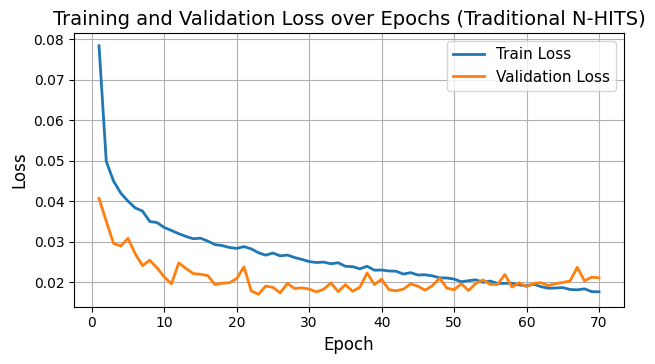

In [26]:
import matplotlib.pyplot as plt

# Apply journal style formatting
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 11,
    'figure.titlesize': 14
})

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(6.5, 3.8))  # IEEE 1-column size

plt.plot(epochs, train_losses, label='Train Loss', linewidth=2)
plt.plot(epochs, test_losses, label='Validation Loss', linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs (Traditional N-HITS)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save high-resolution version
plt.savefig(r"D:\Projects\quantum forecasting\plots\NASA\NHITS\loss_curve.png", dpi=300, bbox_inches='tight')
plt.show()


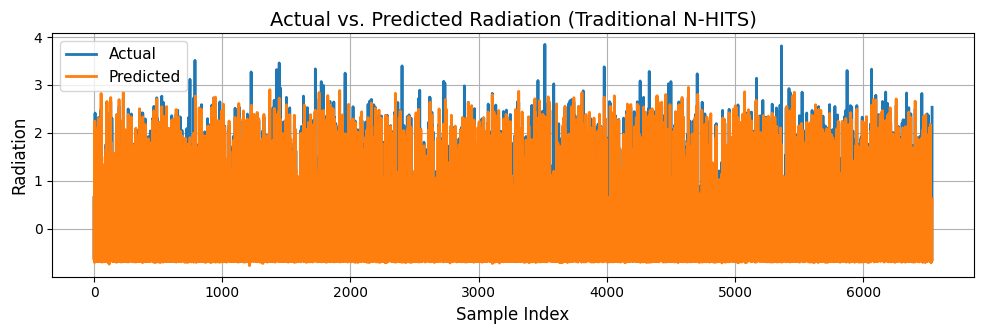

In [6]:
import matplotlib.pyplot as plt

# Set global font styles for publication quality
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 11,
    'figure.titlesize': 14
})

# Create plot
plt.figure(figsize=(10, 3.5))  # Ideal for one-column width (approx 3.5–3.7 in in journals)
plt.plot(y_test_np, label='Actual', linewidth=2)
plt.plot(y_pred_np, label='Predicted', linewidth=2)

plt.title("Actual vs. Predicted Radiation (Traditional N-HITS)")
plt.xlabel("Sample Index")
plt.ylabel("Radiation")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

# Save high-resolution figure
plt.savefig(r"D:\Projects\quantum forecasting\plots\NASA\NHITS\actual_vs_predicted.png", dpi=300, bbox_inches='tight')

plt.show()


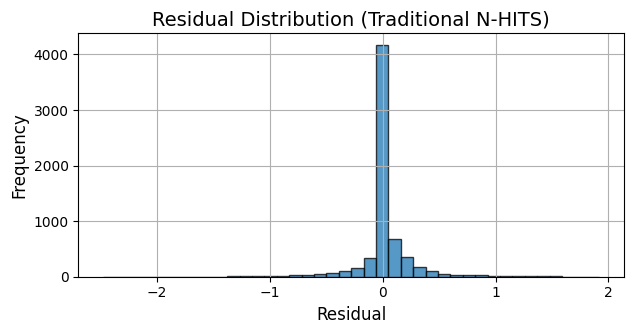

In [15]:
import matplotlib.pyplot as plt

# Set publication-style font configuration
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 11,
    'figure.titlesize': 14
})

residuals = y_test_np - y_pred_np

# Plot residual histogram
plt.figure(figsize=(6.5, 3.5))  # Suitable for 1-column figure (IEEE ~3.5 in width)
plt.hist(residuals, bins=40, alpha=0.75, edgecolor='black')

plt.title("Residual Distribution (Traditional N-HITS)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()

# Save high-resolution image
plt.savefig(r"D:\Projects\quantum forecasting\plots\NASA\NHITS\residual_distribution.png", dpi=300, bbox_inches='tight')

plt.show()


In [16]:
error = abs(y_test_np - y_pred_np)

top_indices = np.argsort(error)[-70:][::-1]  # descending order
print("Top 5 indices with maximum error:", top_indices)



Top 5 indices with maximum error: [2158 4410 2392 4978 6018  173 4955 5132 3660 6082 3530 4763 5285 1946
 1642 5642 4660 6409 4665  745 1367  618 1992 1220 2097 1468 5373 2019
 3022 1066 2422 2977 4964 5455 4094 3691 5971 5627 3443 3564 4285 1649
 4909 1266 4269 2394 3792 4064 3358 1761  131  139   63 6109 5845 3286
 2712 4286 3373 1559 5809 3672 1867 5179 3603 3961  734 4006 2525 3699]


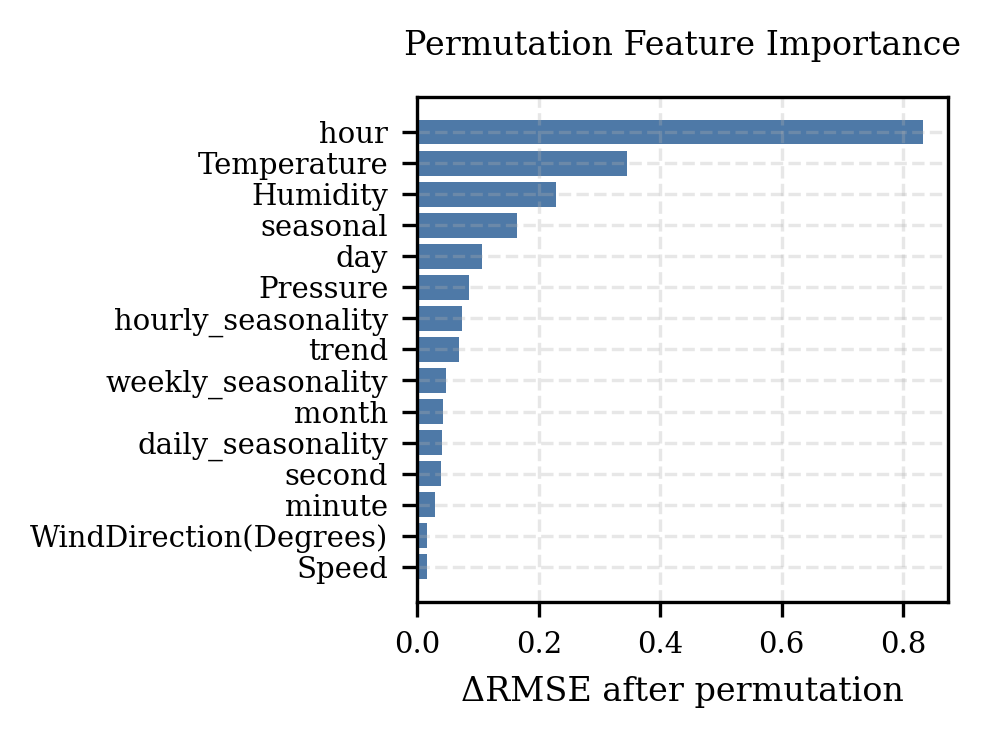

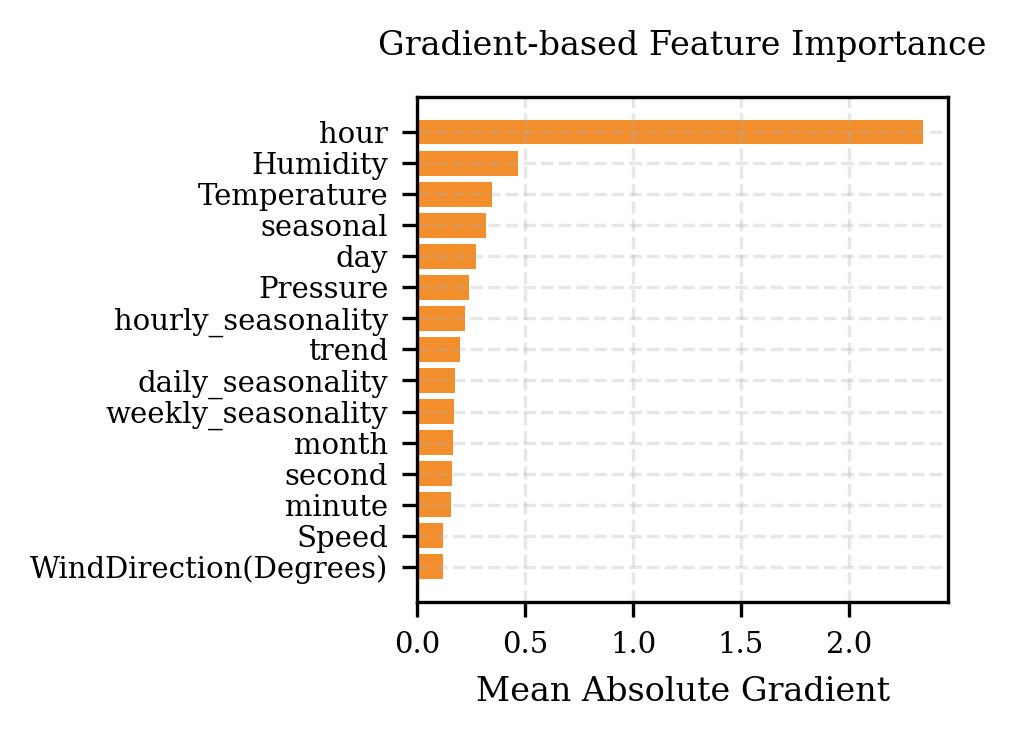

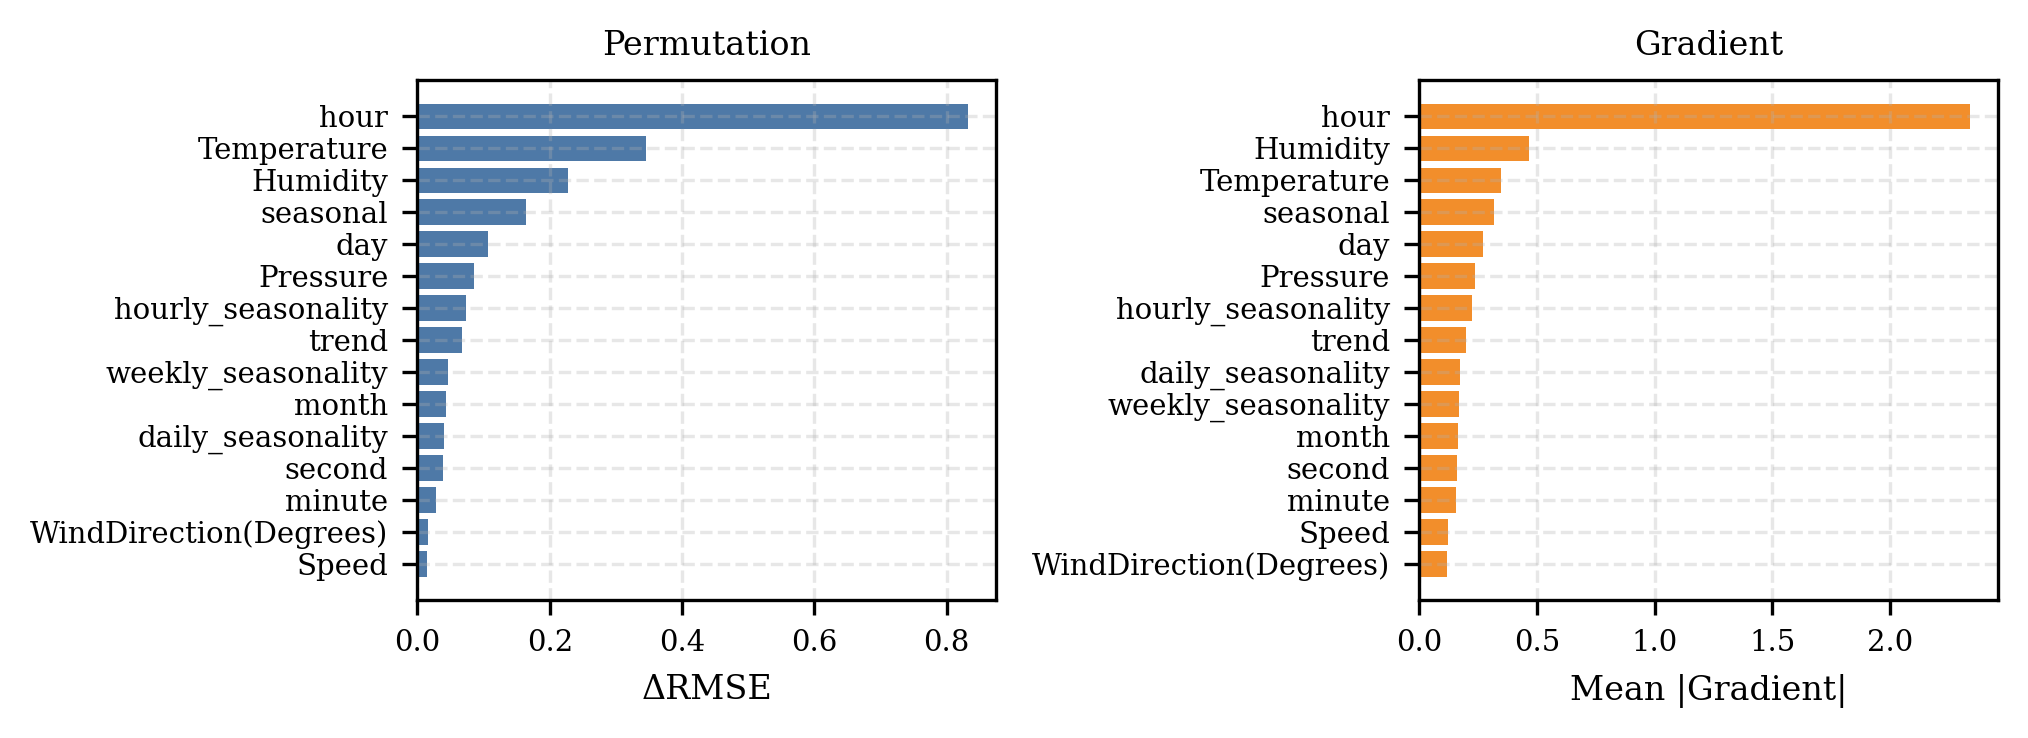

In [6]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import mean_squared_error

# ---------- PREPARE ----------
model.eval()

# Ensure all tensors are on the same device as the model
device = next(model.parameters()).device
X_test_perm = X_test_t.clone().to(device)
y_test_true = y_test_t.clone().to(device)

# Get baseline predictions and RMSE
base_preds = model(X_test_perm).detach().cpu().numpy().flatten()
base_rmse = np.sqrt(mean_squared_error(y_test_true.cpu().numpy().flatten(), base_preds))

# ---------- PERMUTATION IMPORTANCE ----------
perm_importances = []

# Input features
input_features = [
    "trend", "seasonal", 'daily_seasonality', 'hourly_seasonality', 'weekly_seasonality',
    'Temperature', 'Pressure', 'Humidity',
    'WindDirection(Degrees)', 'Speed', 'month', 'day', 'hour', 'minute', 'second'
]

for i in range(X_test_perm.shape[1]):
    X_permuted = X_test_perm.clone()
    idx = torch.randperm(X_test_perm.size(0))
    X_permuted[:, i] = X_permuted[idx, i]  # Shuffle one column
    perm_preds = model(X_permuted).detach().cpu().numpy().flatten()
    perm_rmse = np.sqrt(mean_squared_error(y_test_true.cpu().numpy(), perm_preds))
    importance = perm_rmse - base_rmse
    perm_importances.append(importance)

# Create DataFrame for permutation importance
importance_df = pd.DataFrame({
    "Feature": input_features,
    "Importance (RMSE Increase)": perm_importances
}).sort_values(by="Importance (RMSE Increase)", ascending=True)

# ---------- GRADIENT-BASED IMPORTANCE ----------
X_test_t = X_test_t.to(device)
X_test_t.requires_grad = True
grad_importances = torch.zeros(X_test_t.shape[1], device=device)

for i in range(X_test_t.shape[0]):
    model.zero_grad()
    output = model(X_test_t[i:i+1])
    output.backward(torch.ones_like(output))
    grad_importances += X_test_t.grad[i].abs().detach()

grad_importances /= X_test_t.shape[0]

# Create DataFrame for gradient importance
grad_importance_df = pd.DataFrame({
    "Feature": input_features,
    "Gradient Importance": grad_importances.cpu().numpy()
}).sort_values(by="Gradient Importance", ascending=True)

# ---------- IEEE/Elsevier STYLE PLOTTING ----------
mpl.rcParams.update({
    "font.family": "serif",
    "font.size": 8,
    "axes.labelsize": 8,
    "axes.titlesize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "legend.fontsize": 7,
    "figure.figsize": (3.3, 2.5),
    "figure.dpi": 300,
    "savefig.dpi": 600,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "grid.linestyle": "--"
})

# --- Permutation Plot ---
plt.figure()
plt.barh(importance_df["Feature"], importance_df["Importance (RMSE Increase)"], color="#4E79A7")
plt.xlabel("ΔRMSE after permutation")
plt.title("Permutation Feature Importance", pad=10)
plt.tight_layout()
plt.savefig(r"D:\Projects\quantum forecasting\plots\NASA\QNHITS\permutation_importance.png")
plt.show()

# --- Gradient Plot ---
plt.figure()
plt.barh(grad_importance_df["Feature"], grad_importance_df["Gradient Importance"], color="#F28E2B")
plt.xlabel("Mean Absolute Gradient")
plt.title("Gradient-based Feature Importance", pad=10)
plt.tight_layout()
plt.savefig(r"D:\Projects\quantum forecasting\plots\NASA\QNHITS\gradient_importance.png")
plt.show()

# --- Combined Plot (Optional) ---
fig, ax = plt.subplots(1, 2, figsize=(6.8, 2.5))
ax[0].barh(importance_df["Feature"], importance_df["Importance (RMSE Increase)"], color="#4E79A7")
ax[0].set_title("Permutation", fontsize=8)
ax[0].set_xlabel("ΔRMSE", fontsize=8)

ax[1].barh(grad_importance_df["Feature"], grad_importance_df["Gradient Importance"], color="#F28E2B")
ax[1].set_title("Gradient", fontsize=8)
ax[1].set_xlabel("Mean |Gradient|", fontsize=8)

for a in ax:
    a.tick_params(axis='both', which='major', labelsize=7)
    a.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig(r"D:\Projects\quantum forecasting\plots\NASA\NHITS\feature_importance_combined.png")
plt.show()
